# Economy of Nigeria

In [3]:
from bs4 import BeautifulSoup
import requests

In [7]:
url = 'https://en.wikipedia.org/wiki/Economy_of_Nigeria'


agent = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/120.0.0.0 Safari/537.36"
}

page = requests.get(url, headers = agent)
print(page)

<Response [200]>


In [11]:
soup = BeautifulSoup(page.text, 'html')
print(soup)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Economy of Nigeria - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector

In [13]:
soup.find_all('table')

[<table class="infobox" style="width:26.0em;padding:0;"><caption class="infobox-title adr">Economy of <span class="country-name">Nigeria</span></caption><tbody><tr><td class="infobox-image" colspan="2"><span class="mw-default-size" typeof="mw:File/Frameless"><a class="mw-file-description" href="/wiki/File:Aerial_view_of_victoria_island_in_Lagos,_Nigeria_with_habours_for_yatches.jpg"><img class="mw-file-element" data-file-height="2268" data-file-width="3498" decoding="async" height="162" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/72/Aerial_view_of_victoria_island_in_Lagos%2C_Nigeria_with_habours_for_yatches.jpg/250px-Aerial_view_of_victoria_island_in_Lagos%2C_Nigeria_with_habours_for_yatches.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/7/72/Aerial_view_of_victoria_island_in_Lagos%2C_Nigeria_with_habours_for_yatches.jpg/500px-Aerial_view_of_victoria_island_in_Lagos%2C_Nigeria_with_habours_for_yatches.jpg 1.5x" width="250"/></a></span><div class="infobox-caption"

In [15]:
table = soup.find("table", class_ ="wikitable sortable sticky-header")
print(table)

<table class="wikitable sortable sticky-header" style="text-align:center;">
<tbody><tr>
<th>Year
</th>
<th>GDP<br/><small>(in bn. US$PPP)</small>
</th>
<th>GDP per capita<br/><small>(in US$ PPP)</small>
</th>
<th>GDP<br/><small>(in bn. US$nominal)</small>
</th>
<th>GDP per capita<br/><small>(in US$ nominal)</small>
</th>
<th>GDP growth<br/><small>(real)</small>
</th>
<th>Inflation rate<br/><small>(in Percent)</small>
</th>
<th>Government debt<br/><small>(in % of GDP)</small>
</th></tr>
<tr>
<td>1990
</td>
<td>165.5
</td>
<td>1,739
</td>
<td>62.2
</td>
<td>653
</td>
<td>n/a
</td>
<td>n/a
</td>
<td>71.7%
</td></tr>
<tr>
<td>1991
</td>
<td><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/20px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/40px-Increase2.svg.png

In [17]:
#column = table.find_all('th')
#print(column)

#headers = []
#for th in table.find_all("th"):
 #   headers.append(th.get_text(strip=True))

#print(headers)


columns = [th.get_text(strip=True) for th in table.find_all("th")]
print(columns)

['Year', 'GDP(in bn. US$PPP)', 'GDP per capita(in US$ PPP)', 'GDP(in bn. US$nominal)', 'GDP per capita(in US$ nominal)', 'GDP growth(real)', 'Inflation rate(in Percent)', 'Government debt(in\xa0% of GDP)']


In [19]:
import pandas as pd

In [21]:
df = pd.DataFrame(columns = columns)

df

,Year,GDP(in bn. US$PPP),GDP per capita(in US$ PPP),GDP(in bn. US$nominal),GDP per capita(in US$ nominal),GDP growth(real),Inflation rate(in Percent),Government debt(in % of GDP)


In [23]:
#column_data = table.find_all('tr')

tbody = table.find("tbody")
rows = tbody.find_all("tr")

for row in rows:
    cells = row.find_all("td")
    if not cells:
        continue  # skip rows with no <td> (header/subheader)

    row_values = [c.get_text(strip=True) for c in cells]

    # Normalize row length
    if len(row_values) < len(columns):
        row_values += [""] * (len(columns) - len(row_values))
    elif len(row_values) > len(columns):
        row_values = row_values[:len(columns)]

    df.loc[len(df)] = row_values



In [25]:
df

,Year,GDP(in bn. US$PPP),GDP per capita(in US$ PPP),GDP(in bn. US$nominal),GDP per capita(in US$ nominal),GDP growth(real),Inflation rate(in Percent),Government debt(in % of GDP)
0,1990,165.5,"1,739",62.2,653,n/a,n/a,71.7%
1,1991,170.2,"1,743",60.1,616,-0.6%,n/a,75.0%
2,1992,177.9,"1,776",52.3,522,2.2%,n/a,70.2%
3,1993,185.0,"1,801",56.8,553,1.6%,n/a,71.0%
4,1994,189.4,"1,799",80.1,761,0.3%,n/a,55.9%
5,1995,197.0,"1,825",132.2,"1,225",1.9%,n/a,34.0%
6,1996,208.7,"1,886",172.7,"1,560",4.1%,29.3%,25.2%
7,1997,218.5,"1,925",187.9,"1,656",2.9%,10.7%,24.1%
8,1998,226.4,"1,947",209.7,"1,803",2.5%,7.9%,22.3%
9,1999,230.8,"1,935",57.5,482,0.5%,6.6%,64.9%


In [139]:
df.to_csv(r'C:\Users\JONATHAN\Desktop\WORK\Nigerian_Economy.csv', index = False)

In [331]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [29]:
print(plt.style.available)
plt.style.use('classic')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [123]:
df = pd.read_csv(r'C:\Users\JONATHAN\Desktop\WORK\Nigerian_Economy.csv')

df = df.replace(',', '', regex=True)

In [127]:
print(df.dtypes)

Year                                int64
GDP(in bn. US$PPP)                 object
GDP per capita(in US$ PPP)         object
GDP(in bn. US$nominal)            float64
GDP per capita(in US$ nominal)     object
GDP growth(real)                   object
Inflation rate(in Percent)         object
Government debt(in % of GDP)       object
dtype: object


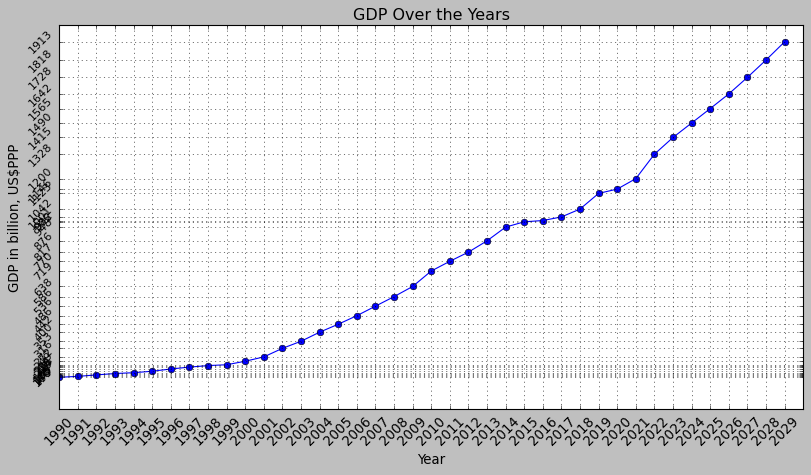

In [335]:

df["GDP(in bn. US$PPP)"] = pd.to_numeric(df["GDP(in bn. US$PPP)"], errors="coerce")
plt.figure(figsize=(12,6))
plt.plot(df["Year"].values, df["GDP(in bn. US$PPP)"].values, marker="o")
plt.title("GDP Over the Years")

plt.xticks(df["Year"].values, df["Year"].astype(int), rotation=45)
plt.yticks(df["GDP(in bn. US$PPP)"].values, fontsize=10, rotation=45)



plt.xlabel("Year")
plt.ylabel("GDP in billion, US$PPP")



plt.grid(True)
plt.show()

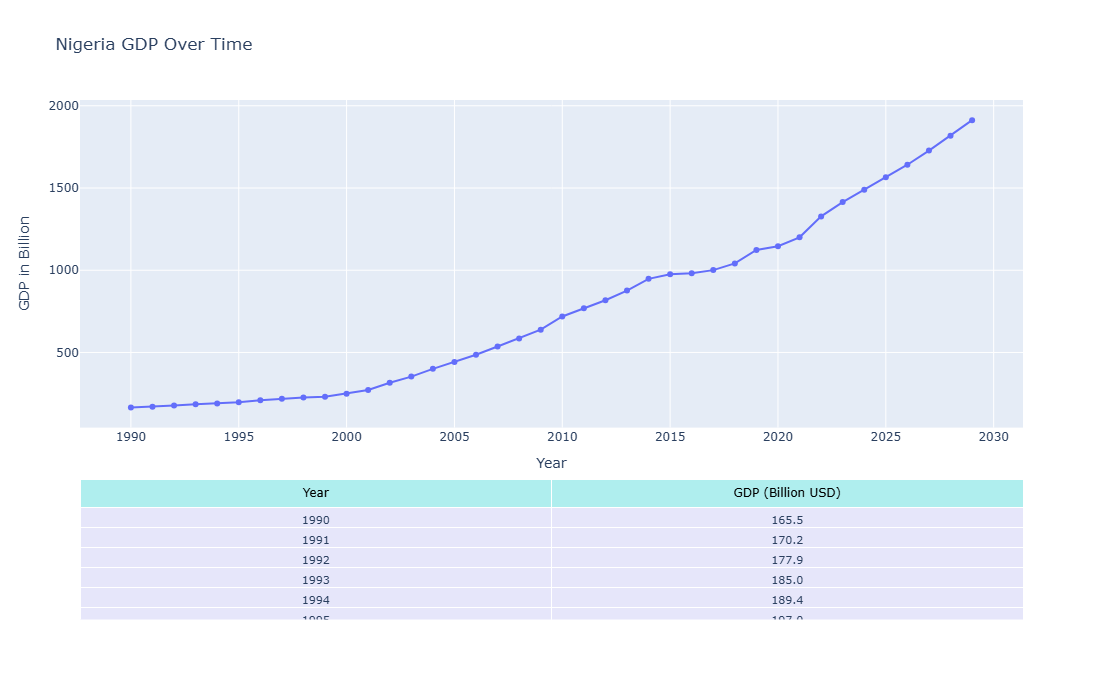

In [562]:


data = {
    "Year": list(range(1990, 2030)),
    "GDP(in bn. US$PPP)": [
        165.5, 170.2, 177.9, 185, 189.4, 197, 208.7, 218.5, 226.4, 230.8,
        249.1, 271.7, 316.2, 353.1, 400.4, 441.9, 486.2, 535.9, 585.5, 638.4,
        718.9, 769.6, 817.4, 876.2, 947.7, 975.2, 981.9, 1000.7, 1041.7, 1123.3,
        1145.7, 1200.1, 1327.5, 1414.6, 1489.8, 1564.9, 1641.5, 1727.6, 1818.0, 1912.8
    ]
}
df = pd.DataFrame(data)

# Ensure numeric type
df['GDP(in bn. US$PPP)'] = pd.to_numeric(df['GDP(in bn. US$PPP)'], errors='coerce')



# Create figure with 2 rows: chart + table
fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.1,
    row_heights=[0.7, 0.3],
    specs=[[{"type": "xy"}], [{"type": "table"}]]
)

# Add line chart
fig.add_trace(
    go.Scatter(
        x=df['Year'],
        y=df['GDP(in bn. US$PPP)'],
        mode='lines+markers',
        name='GDP',
        hovertemplate='Year: %{x}<br>GDP: %{y:,.1f} B'
    ),
    row=1, col=1
)

# Add table below
fig.add_trace(
    go.Table(
        header=dict(
            values=["Year", "GDP (Billion USD)"],
            fill_color='paleturquoise',
            align='center',
            font=dict(size=12, color='black')
        ),
        cells=dict(
            values=[df['Year'], df['GDP(in bn. US$PPP)'].map("{:,.1f}".format)],
            fill_color='lavender',
            align='center',
            font=dict(size=11)
        )
    ),
    row=2, col=1
)

# Update layout
fig.update_layout(
    height=700,
    title_text="Nigeria GDP Over Time",
    xaxis=dict(title='Year'),
    yaxis=dict(title='GDP in Billion'),

)

fig.show()


In [281]:
df = pd.read_csv(r'C:\Users\JONATHAN\Desktop\WORK\Nigerian_Economy.csv')

In [297]:
df['GDP growth(real)'] = df['GDP growth(real)'].replace('%','', regex=True)
df['GDP growth(real)'] = pd.to_numeric(df['GDP growth(real)'], errors='coerce')
df['GDP growth(real)'] = df['GDP growth(real)'].fillna(0)  # or use the next year's value

print(df['GDP growth(real)'] )


0      0.0
1     -0.6
2      2.2
3      1.6
4      0.3
5      1.9
6      4.1
7      2.9
8      2.5
9      0.5
10     5.5
11     6.7
12    14.6
13     9.5
14    10.4
15     7.0
16     6.7
17     7.3
18     7.2
19     8.4
20    11.3
21     4.9
22     4.3
23     5.4
24     6.3
25     2.7
26    -1.6
27     0.8
28     1.9
29     2.2
30    -1.8
31     3.6
32     3.3
33     2.9
34     2.9
35     3.2
36     3.0
37     3.3
38     3.3
39     3.3
Name: GDP growth(real), dtype: float64


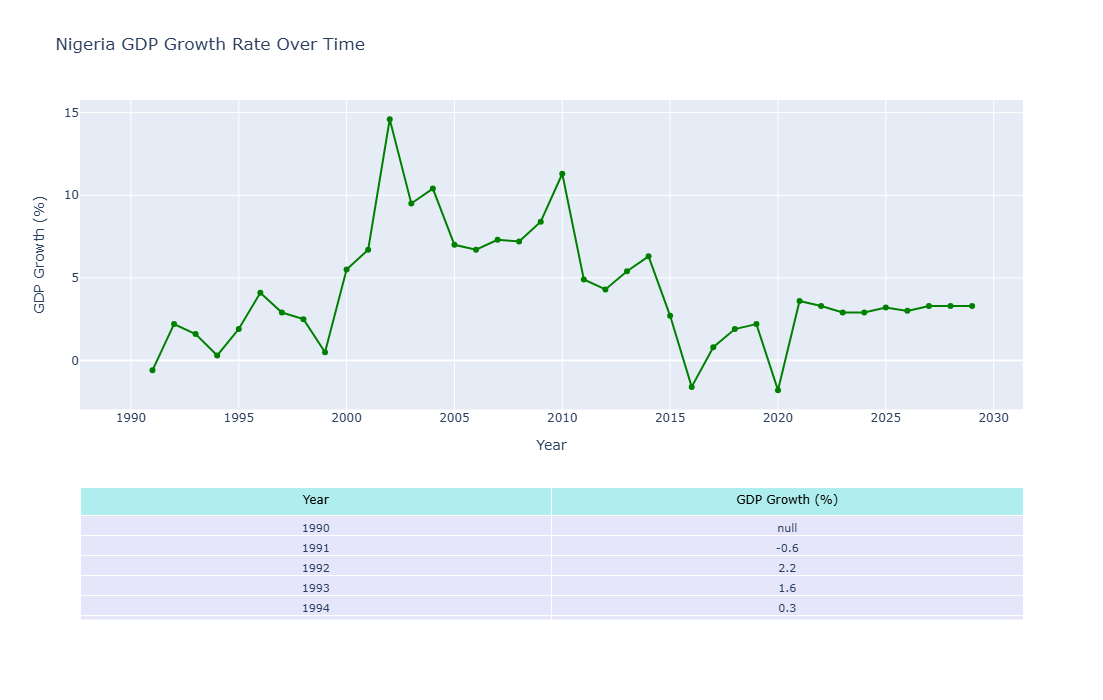

In [560]:

# Prepare the data

years = list(range(1990, 2030))

growth_data = [
    "n/a", "-0.60%", "2.20%", "1.60%", "0.30%", "1.90%", "4.10%", "2.90%",
    "2.50%", "0.50%", "5.50%", "6.70%", "14.60%", "9.50%", "10.40%", "7.00%",
    "6.70%", "7.30%", "7.20%", "8.40%", "11.30%", "4.90%", "4.30%", "5.40%",
    "6.30%", "2.70%", "-1.60%", "0.80%", "1.90%", "2.20%", "-1.80%", "3.60%",
    "3.30%", "2.90%", "2.90%", "3.20%", "3.00%", "3.30%", "3.30%", "3.30%"
]

df = pd.DataFrame({
    "Year": years,
    "GDP growth(real)": growth_data
})

# Clean GDP growth
df['GDP growth(real)'] = pd.to_numeric(df['GDP growth(real)'].str.replace('%','', regex=True), errors='coerce')



# Create Plotly figure

fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.15,
    row_heights=[0.7, 0.3],
    specs=[[{"type": "xy"}], [{"type": "table"}]]
)

# Add GDP growth line chart
fig.add_trace(
    go.Scatter(
        x=df['Year'],
        y=df['GDP growth(real)'],
        mode='lines+markers',
        name='GDP Growth (%)',
        line=dict(color='green'),
        hovertemplate="Year: %{x}<br>Growth: %{y:,.2f}%"
    ),
    row=1, col=1
)

# Add data table
fig.add_trace(
    go.Table(
        header=dict(
            values=["Year", "GDP Growth (%)"],
            fill_color='paleturquoise',
            align='center',
            font=dict(size=12, color='black')
        ),
        cells=dict(
            values=[df['Year'], df['GDP growth(real)']],
            fill_color='lavender',
            align='center',
            font=dict(size=11)
        )
    ),
    row=2, col=1
)

# Layout
fig.update_layout(
    height=700,
    title_text="Nigeria GDP Growth Rate Over Time",
    xaxis=dict(title='Year'),
    yaxis=dict(title='GDP Growth (%)'),
)

fig.show()


In [566]:
df = pd.read_csv(r'C:\Users\JONATHAN\Desktop\WORK\Nigerian_Economy.csv')
df.rename(columns={"Inflation rate(in Percent)": "Inflation_rate(in_Percent)"}, inplace=True)
df["Inflation_rate(in_Percent)"] = df["Inflation_rate(in_Percent)"].fillna(0)
df["Inflation_rate(in_Percent)"] = (
    df["Inflation_rate(in_Percent)"]
    .astype(str)
    .str.replace("%", "", regex=True)
    .str.strip()
    .replace("n/a", None)
)
df["Inflation_rate(in_Percent)"] = pd.to_numeric(df["Inflation_rate(in_Percent)"], errors="coerce")

In [568]:
print(df["Inflation_rate(in_Percent)"])

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6     29.3
7     10.7
8      7.9
9      6.6
10     6.9
11    18.9
12    12.9
13    14.0
14    15.0
15    17.9
16     8.2
17     5.4
18    11.6
19    12.5
20    13.7
21    10.8
22    12.2
23     8.5
24     8.0
25     9.0
26    15.7
27    16.5
28    12.1
29    11.4
30    13.2
31    17.0
32    18.8
33    24.7
34    32.5
35    25.0
36    15.2
37    15.4
38    14.0
39    14.0
Name: Inflation_rate(in_Percent), dtype: float64


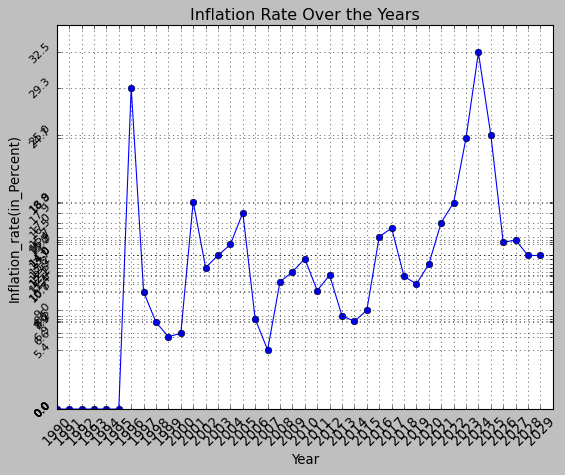

In [570]:



plt.plot(df["Year"].values, df["Inflation_rate(in_Percent)"].values, marker="o")
plt.title("Inflation Rate Over the Years")

plt.xticks(df["Year"].values, df["Year"].astype(int), rotation=45)
plt.yticks(df["Inflation_rate(in_Percent)"].values, fontsize=10, rotation=45)



plt.xlabel("Year")
plt.ylabel("Inflation_rate(in_Percent)")



plt.grid(True)
plt.show()

In [544]:
df.rename(columns={"\tGovernment debt(in % of GDP)": "Government debt(in % of GDP)"}, inplace=True)
df['Government debt(in % of GDP)'] = pd.to_numeric(df['Government debt(in % of GDP)'], errors='coerce')

In [548]:
df['Government debt(in % of GDP)'] = df['Government debt(in % of GDP)'].replace('%','', regex=True)

#df['GDP growth(real)'] = df['GDP growth(real)'].fillna(0)  # or use the next year's value

print(df['Government debt(in % of GDP)'] )

0     71.7
1     75.0
2     70.2
3     71.0
4     55.9
5     34.0
6     25.2
7     24.1
8     22.3
9     64.9
10    57.6
11    53.1
12    43.3
13    42.1
14    35.5
15    18.9
16     9.4
17     8.1
18     7.3
19     8.6
20     9.4
21    17.4
22    17.6
23    18.3
24    17.5
25    20.3
26    23.4
27    24.3
28    27.7
29    29.2
30    34.5
31    35.7
32    39.7
33    46.4
34    51.3
35    50.0
36    48.9
37    48.5
38    49.0
39    49.3
Name: Government debt(in % of GDP), dtype: float64


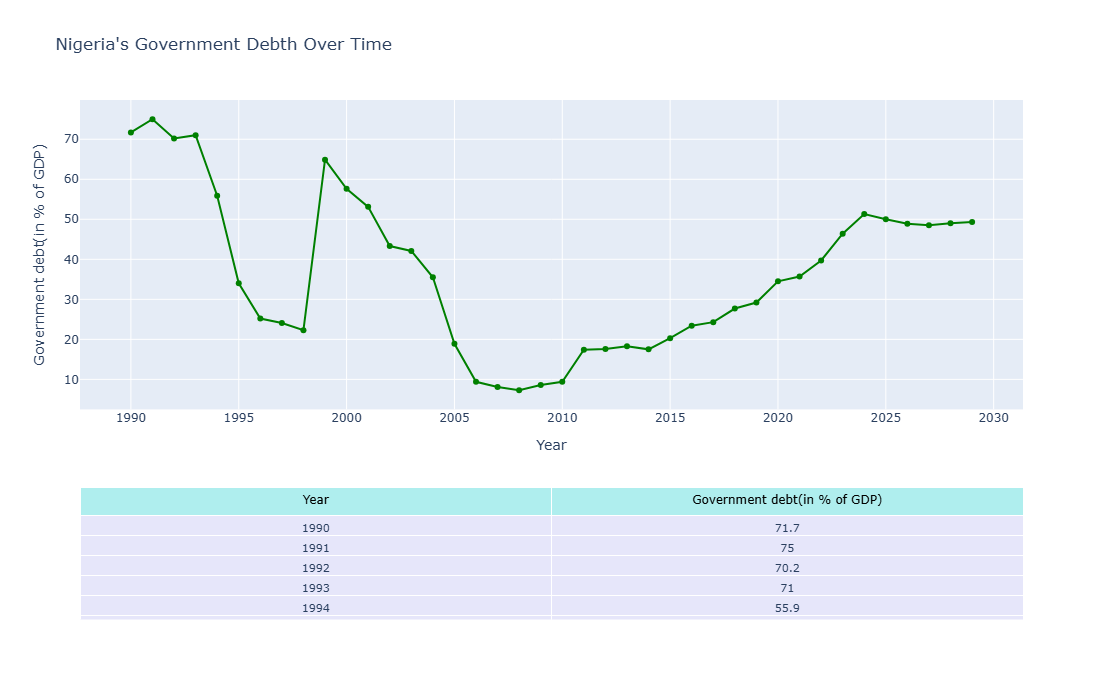

In [556]:
#import pandas as pd
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots

# -----------------------------
# Step 1: Prepare the data
# -----------------------------
years = list(range(1990, 2030))

debth_data = [
   71.70, 75.00, 70.20, 71.00, 55.90, 34.00, 25.20, 24.10, 22.30, 64.90,
    57.60, 53.10, 43.30, 42.10, 35.50, 18.90, 9.40, 8.10, 7.30, 8.60,
    9.40, 17.40, 17.60, 18.30, 17.50, 20.30, 23.40, 24.30, 27.70, 29.20,
    34.50, 35.70, 39.70, 46.40, 51.30, 50.00, 48.90, 48.50, 49.00, 49.30

]



df = pd.DataFrame({
    "Year": years,
    "Government debt(in % of GDP)": debth_data
})



fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.15,
    row_heights=[0.7, 0.3],
    specs=[[{"type": "xy"}], [{"type": "table"}]]
)

# Add GDP growth line chart
fig.add_trace(
    go.Scatter(
        x=df['Year'],
        y=df['Government debt(in % of GDP)'],
        mode='lines+markers',
        name='Government Debth Over the Years',
        line=dict(color='green'),
        hovertemplate="Year: %{x}<br>Growth: %{y:,.2f}%"
    ),
    row=1, col=1
)

# Add data table
fig.add_trace(
    go.Table(
        header=dict(
            values=["Year", "Government debt(in % of GDP)"],
            fill_color='paleturquoise',
            align='center',
            font=dict(size=12, color='black')
        ),
        cells=dict(
            values=[df['Year'], df['Government debt(in % of GDP)']],
            fill_color='lavender',
            align='center',
            font=dict(size=11)
        )
    ),
    row=2, col=1
)

# -----------------------------
# Step 3: Layout
# -----------------------------
fig.update_layout(
    height=700,
    title_text="Nigeria's Government Debth Over Time",
    xaxis=dict(title='Year'),
    yaxis=dict(title='Government debt(in % of GDP)'),
)

fig.show()


In [550]:
df

,Year,GDP(in bn. US$PPP),GDP per capita(in US$ PPP),GDP(in bn. US$nominal),GDP per capita(in US$ nominal),GDP growth(real),Inflation_rate(in_Percent),Government debt(in % of GDP)
0,1990,165.5,"1,739",62.2,653,NaN,0.0,71.7
1,1991,170.2,"1,743",60.1,616,NaN,0.0,75.0
2,1992,177.9,"1,776",52.3,522,NaN,0.0,70.2
3,1993,185,"1,801",56.8,553,NaN,0.0,71.0
4,1994,189.4,"1,799",80.1,761,NaN,0.0,55.9
5,1995,197,"1,825",132.2,"1,225",NaN,0.0,34.0
6,1996,208.7,"1,886",172.7,"1,560",NaN,29.3,25.2
7,1997,218.5,"1,925",187.9,"1,656",NaN,10.7,24.1
8,1998,226.4,"1,947",209.7,"1,803",NaN,7.9,22.3
9,1999,230.8,"1,935",57.5,482,NaN,6.6,64.9


In [532]:
print(df.columns.tolist())

['Year', 'GDP(in bn. US$PPP)', 'GDP per capita(in US$ PPP)', 'GDP(in bn. US$nominal)', 'GDP per capita(in US$ nominal)', 'GDP growth(real)', 'Inflation_rate(in_Percent)', 'Government debt(in % of GDP)']
